___
### IMPORTS

In [152]:
# Modules used for data handling / test
import pickle

from utils import get_collection, show_collection, mklist


# Modules used for EDA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns




# Modules used for image processing


from collections import Counter
from utils import crop_img, chi_osc, extract_img_data, get_img_rgb
from utils import resize_img, reduce_col_palette, whitespace


# Modules used for ML
from utils_ML import reg_scoring, clas_scoring


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Example datasets
from sklearn.datasets import load_iris, make_moons
# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# Classification metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
# Train/test
from sklearn.model_selection import train_test_split
# Regression
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# Preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Decision trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [153]:
# Modules settings
%matplotlib inline

sns.set_theme(style='whitegrid', rc={'figure.figsize': (20, 10)})

In [154]:
# UTILS
# To get model scoring for regression models
def model_scoring_regression(name, model, x, y, set='test'):
    name = f'{name.upper()} ({set} data)'
    preds = model.predict(x)

    metrics = pd.DataFrame({name: [f'{model.score(x, y):.10f}',
                                   f'{mean_absolute_error(y, preds):.10f}',
                                   f'{mean_absolute_percentage_error(y, preds):.10f}',
                                   f'{mean_squared_error(y, preds):.10f}',
                                   f'{np.sqrt(mean_squared_error(y, preds)):.10f}']},
                           index=[['Score (R2 coef.)', 'MAE', 'MAPE', 'MSE', 'RMSE']])

    return metrics

# To get model scoring for classification models
def model_scoring_classification(name, model, x, y, set='test'):
    name = f'{name.upper()} ({set} data)'
    preds = model.predict(x)

    metrics = pd.DataFrame({name: [f'{accuracy_score(y, preds):.10f}',
                                   f'{precision_score(y, preds):.10f}',
                                   f'{recall_score(y, preds):.10f}',
                                   f'{f1_score(y, preds):.10f}',
                                   f'{roc_auc_score(y, preds):.10f}']},
                           index=[['Accuracy (TP + TN/TT)', 'Precision (TP/TP + FP)', 'Recall (TP/TP + FN)',
                                   'F1 (har_mean Ac, Re)', 'ROC AUC']])

    return metrics


# Show polynomial regression
def viz_poly(model, x, x_poly, y):
    plt.scatter(x, y, color='darkred')
    plt.plot(x, model.predict(x_poly), color='cornflowerblue')
    plt.title(nameof(model, globals()))
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()

    return


# To return the name of an object
def nameof(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

___
### UPDATE UTILS

In [155]:
# This cell only needs to be executed to update utils
# if modified after been imported

%run utils_ML

<Figure size 1440x720 with 0 Axes>

___
### GETTING DATASET

In [156]:
with open('./data/large_museum/large_museum_clean', 'rb') as file:
    museum = pickle.load(file)

In [157]:
museum

,img_ID,artist,group,width_std,whitespace_std,chiaroscuro_std,ratio_std,c01_std,c02_std,c03_std,c04_std,c05_std,c06_std,c07_std,c08_std,c09_std,c10_std
0,9223372032559824886,caravaggio,0,-0.595676,-0.555053,-0.121122,0.366144,-0.921670,1.388599,-0.935703,0.360891,1.238188,-0.353776,0.485056,-1.067667,1.437950,0.710729
1,186636,caravaggio,0,-0.312410,-0.271210,-0.120839,-0.002834,-1.289976,0.538059,-0.964458,1.221173,-0.387606,-0.675702,-0.999377,1.474699,0.426092,-0.978037
2,186724,caravaggio,0,-1.020574,-1.135080,-0.120717,1.148857,-0.921670,0.708167,-0.188086,-1.330996,-1.374694,-0.822032,1.464781,-0.280744,0.487417,1.461292
3,186639,caravaggio,0,0.780186,0.370522,-0.120163,-0.868238,-0.808345,0.481356,-0.073068,1.221173,-0.358574,-0.939097,-0.880622,-0.311011,-0.953713,0.491815
4,186671,caravaggio,0,0.587970,0.284135,-0.120551,-0.757302,-0.298383,0.538059,-1.453285,-0.384686,-0.997278,1.314388,-1.029065,-1.461129,-0.156492,1.117284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4633,229217,velazquez,0,0.931936,0.432227,-0.119765,-0.947593,-1.431632,-0.028969,-1.453285,0.504272,-1.345662,-0.324510,-0.138406,-0.946602,1.437950,-0.446388
4634,229182,velazquez,0,-0.787892,-0.777191,10.295127,0.677812,-0.071734,-1.446537,0.617041,0.934413,0.280131,-0.353776,1.197584,0.929906,-0.340466,1.086011
4635,229183,velazquez,0,-0.666492,-0.629099,-0.121092,0.474214,0.693210,-0.936212,-1.309512,-0.126602,-1.519855,1.314388,-0.880622,-0.734738,0.334105,-0.446388
4636,9223372032559882013,velazquez,0,-1.334190,-1.789152,-0.120486,2.032178,0.551553,-0.936212,-0.245595,-1.359672,0.338195,-0.031849,-0.880622,1.444433,-0.831064,-1.509685


In [158]:
# sns.pairplot(museum);

<AxesSubplot:>

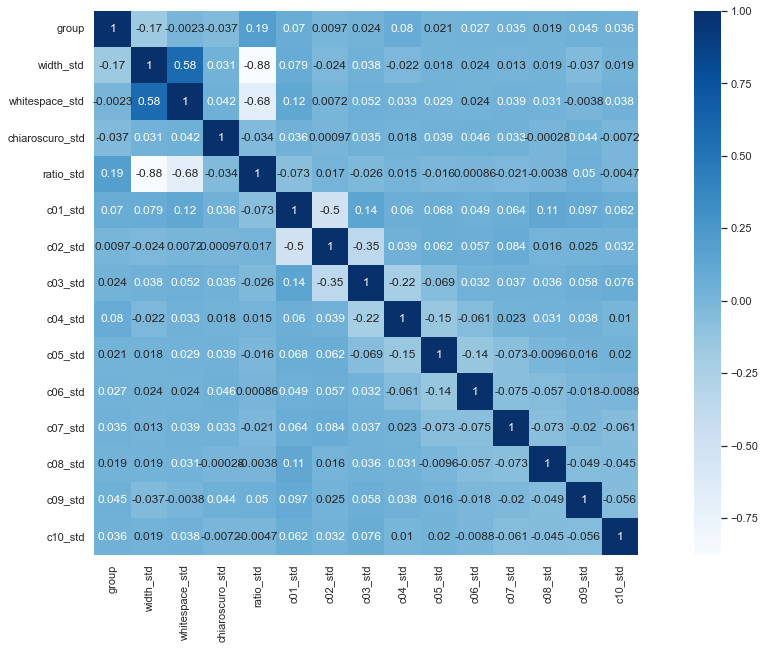

In [159]:
sns.heatmap(museum.corr(), square=True, annot=True, cmap='Blues')

<Figure size 1440x3600 with 0 Axes>

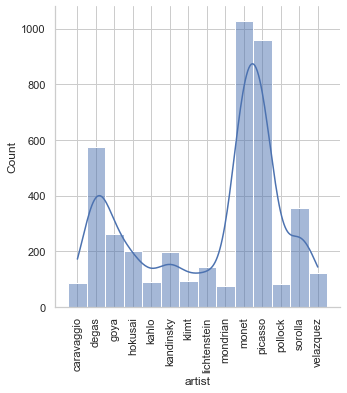

In [160]:
plt.figure(figsize=(20,50))
ax = sns.displot(museum['artist'], kde=True)
plt.xticks(rotation=90);

___
### TRAINING

In [161]:
# Set X, y
X = museum.iloc[:, 2:]
y = museum['group']

In [162]:
# Generate train/test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

___
### LOGISTIC REGRESION

In [163]:
# Instance model
model_logreg = LogisticRegression()

# Fit model
model_logreg.fit(X_train, y_train)

LogisticRegression()

In [164]:
preds = model_logreg.predict(X_test)
preds

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [165]:
preds_proba = model_logreg.predict_proba(X_test)
preds_proba

array([[0.01080889, 0.98919111],
       [0.00691862, 0.99308138],
       [0.99362594, 0.00637406],
       ...,
       [0.00741465, 0.99258535],
       [0.99595472, 0.00404528],
       [0.99550108, 0.00449892]])

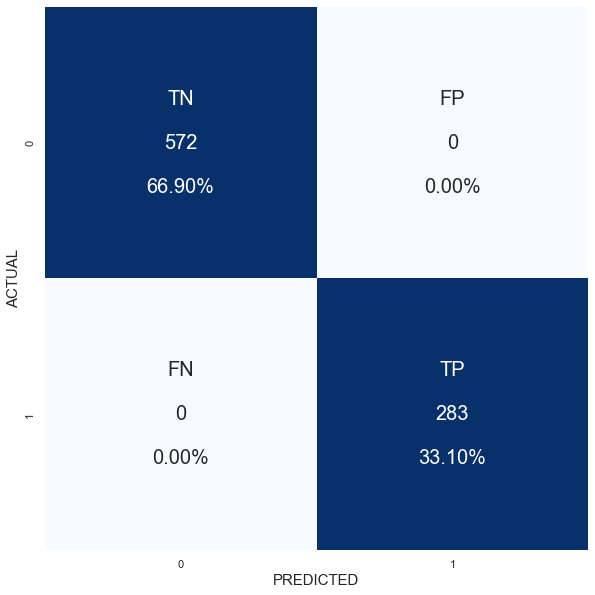

In [166]:
conf_matrix = confusion_matrix(y_test, preds)

########## TODO ##########
# Create function
_names = ['TN', 'FP', 'FN', 'TP']
_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in zip(_names, _counts, _percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(conf_matrix/conf_matrix.sum(axis=1),
            annot=labels, annot_kws={"size": 20},
            fmt='',
            square=True,
            cmap='Blues', cbar=False)

plt.ylabel("ACTUAL", fontsize=15)
plt.xlabel("PREDICTED", fontsize=15);

In [167]:
model_scoring_classification('model_logreg', model_logreg, X_train, y_train, set='train')

,MODEL_LOGREG (train data)
Accuracy (TP + TN/TT),1.0000000000
Precision (TP/TP + FP),1.0000000000
Recall (TP/TP + FN),1.0000000000
"F1 (har_mean Ac, Re)",1.0000000000
ROC AUC,1.0000000000


In [168]:
model_scoring_classification('model_logreg', model_logreg, X_test, y_test, set='test')

,MODEL_LOGREG (test data)
Accuracy (TP + TN/TT),1.0000000000
Precision (TP/TP + FP),1.0000000000
Recall (TP/TP + FN),1.0000000000
"F1 (har_mean Ac, Re)",1.0000000000
ROC AUC,1.0000000000


___
### DECISSION TREE

In [173]:
# Instance model
model_tree = DecisionTreeClassifier(random_state=42)

# Fit model
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

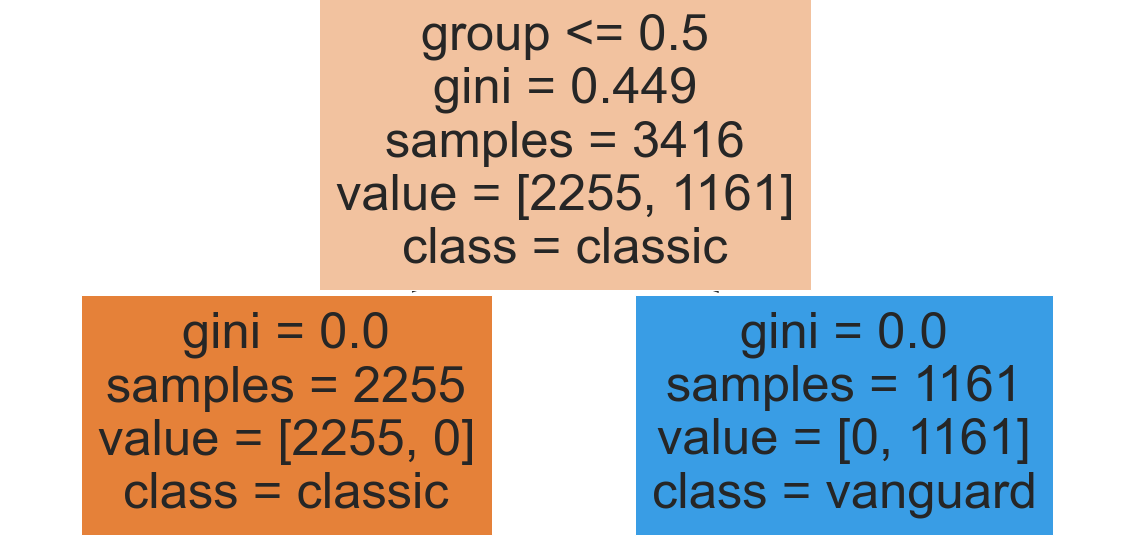

In [174]:
# Tree viz
plot_tree(model_tree,
          feature_names=museum.columns[2:],
          class_names=['classic', 'vanguard'],
          filled=True);

In [175]:
# Predictions return a class in which the model places the data
preds = model_tree.predict(X_test)
preds

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [176]:
preds_proba = model_tree.predict_proba(X_test)
preds_proba

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [178]:
# Build confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Build aux confusion matrix (subtotals by row)
cm_tbyrow = conf_matrix/conf_matrix.sum(axis=1)

# Build aux confusion matrix (subtotals from whole)
cm_t = conf_matrix/conf_matrix.sum()

# Build aux DataFrame to show tags by row
cm_df = pd.DataFrame(conf_matrix,
                     columns=['Pred. class 1',
                              'Pred. class 2'],
                     index=['Actual. class 1',
                            'Actual. class 2'])

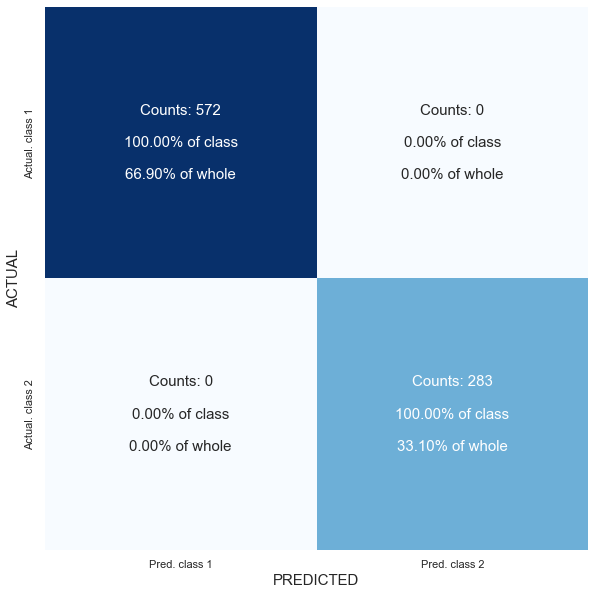

In [180]:
########## TODO ##########
# Create function
_counts = [f'Counts: {value:.0f}' for value in conf_matrix.flatten()]

_percentages = [f'{value:.2%} of class' for value in cm_tbyrow.flatten()]

_global_percentages = [f'{value:.2%} of whole' for value in cm_t.flatten()]

labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1, v2, v3 in zip(_counts, _percentages, _global_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm_df,
            annot=labels, annot_kws={"size": 15},
            fmt='',
            square=True,
            cmap='Blues', cbar=False)

plt.ylabel("ACTUAL", fontsize=15)
plt.xlabel("PREDICTED", fontsize=15);

___
### NEURAL NETWORK

Para red neuronal:  
* Convolución, relu, max_pooling [...] flatten, red neuronal clásica, dropout (para no overfitting) un 25% por ejemplo
* img cuadradras (no recortadas, sino rescaladas)
* escalar los valores de los píxeles (RGB / 255) para que cada píxel valga entre 0 y 1
* mezclar los datos (shuffle) para que no tienda a predecir la última clase que se le pase
* número de filtros alto (32 para distinguir perros o gatos, así que empezamos por 64/128) de dim 5x5 (nº de filtros y dimensión del filtro son discreccionales)

* puedo generar datos a partir de la librería ImageDataGenerator que coge mis imágenes y las gira, estira, desenfoca... En cada época, coge una de las variaciones para que generalice mejor.

___
### CONVOLUTIONAL NEURAL NETWORK